In [1]:
import jax 
import jax.numpy as jnp
import get_initialization_cond as init
import optimization_SPDC as opt
import jax.scipy.optimize as jaxopt
import matplotlib.pyplot as plt
import numpy as np
import jaxopt

np.random.seed(0)

# Initialize the parameters and hyperparameters

In [2]:
Np = 0.01
# higher N and wf+wi makes less unstable pump... need to see if N or wf+wi influences more
N = 601
wi = -10
wf = 10
x = jnp.linspace(wi, wf, N)
freq_range_pump = jnp.linspace(2*wi, 2*wf, 2*N)
freq_range_pump_complex = jnp.concatenate((freq_range_pump, freq_range_pump)).reshape(4*N,)
vp = 0.1
l = 1
# For an unstable pump, just change amplitude to 0.2 and width to 0.2 at N = 1
hermite_init_params = [2, 0.05, 0.3, jnp.pi/5]
cst_init_params = [0.1]
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N = N)
# get the initialization seeds
initial_value_gauss = jnp.array([0.5, 1., 2*jnp.pi/7])
arbitrary_seed_hermite = init.get_initialization_array(hermite_init_params, vp, l, wi, wf, Np, method='hermite', N = N)
random_seed = 0.01*jax.random.uniform(key, shape=(4*N,))
phi = 2*jnp.pi*jax.random.uniform(key)

In [3]:
y_N = 1

In [ ]:
solver = jaxopt.PolyakSGD(opt.get_penalty_loss, maxiter=40, verbose=1)

In [ ]:
pump = random_seed.copy()
for i in range(15):
    print("run " + str(i))
    (pump, state) = solver.run(pump, N, alpha, G, H, l, y_N, freq_range_pump, 3**i)

# Optimization with GradientDescent

In [21]:
armajo_optimizer = jaxopt.ArmijoSGD(fun = opt.get_loss, maxiter=50, verbose=True, tol=0.001)

In [22]:
(pump, state) = armajo_optimizer.run(arbitrary_seed_hermite_order_1, N, alpha, G, H, l, y_N)

error: 15.188131
error: 8.531442
error: 2.8032985
error: 1.0153624
error: 0.7472315
error: 0.81503206
error: 1.082962
error: 1.2040294
error: 1.2442994
error: 1.2048447
error: 1.7633225
error: 1.0402678
error: 0.73155606
error: 0.37454525
error: 0.34619027
error: 0.16709216
error: 0.09842768
error: 0.061208792
error: 0.053958666
error: 0.039724965
error: 0.025822021
error: 0.015789004
error: 0.014135016
error: 0.0103841275
error: 0.0069255284
error: 0.0042874403
error: 0.0038167816
error: 0.0028181053
error: 0.0029229657
error: 0.002150126
error: 0.0014480369
error: 0.0014020451
error: 0.0015941816
error: 0.0003016591


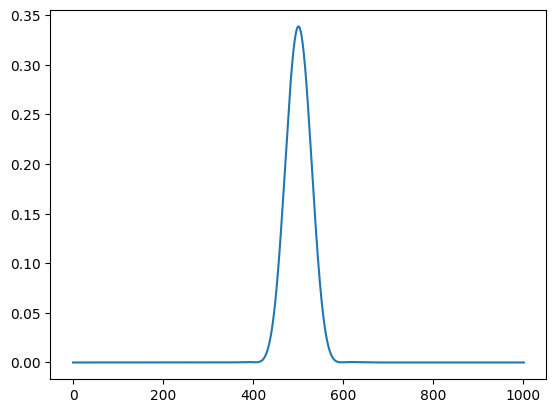

In [25]:
plt.plot(abs(opt.get_complex_array(pump)))

In [6]:
linear_optimizer = jaxopt.GradientDescent(fun = opt.get_loss, verbose=True, maxiter=10)

In [7]:
linear_optimizer.run(arbitrary_seed_hermite_order_1, N, alpha, G, H, l, y_N)

error: 3.936996
error: 1.5633477
error: 1.0895418
error: 1.4978354
error: 1.4175628
error: 2.4901147
error: 2.2026553
error: 3.7036264
error: 20.42397


OptStep(params=DeviceArray([-3.5213278e-19, -7.7573318e-19, -1.2367281e-18, ...,
              5.8599827e-19,  2.7510515e-19,  0.0000000e+00],            dtype=float32), state=ProxGradState(iter_num=DeviceArray(10, dtype=int32, weak_type=True), stepsize=DeviceArray(0.00390625, dtype=float32, weak_type=True), error=DeviceArray(5.9912796, dtype=float32), aux=None, velocity=DeviceArray([-6.2826642e-19, -1.3872305e-18, -2.2156512e-18, ...,
              1.0518073e-18,  4.9300859e-19,  0.0000000e+00],            dtype=float32), t=DeviceArray(6.4631157, dtype=float32, weak_type=True)))